In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow
import glob



In [2]:
#pip install --upgrade pip --user

In [4]:
#!pip install mlxtend
import mlxtend

In [5]:
#conda update --all

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import sklearn
from sklearn.model_selection import train_test_split
# from mlxtend.plotting import plot_confusion_matrix
# from sklearn.metrics import confusion_matrix

In [3]:
import pathlib

In [4]:
pic_pa th=pathlib.Path("C:\\Users\\ss\\Documents\\Data Science Study material\\Deep learning\\Mammoty mohanlal")

In [4]:
pic_path

WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal')

In [10]:
#C:\Users\ss\Documents\Data Science Study material\Deep learning\Mammoty mohanlal\mohanlal

SyntaxError: unexpected character after line continuation character (<ipython-input-10-79a4c3a190cc>, line 1)

In [5]:
mamooty=list(pic_path.glob("mammooty/*"))
mohanlal=list(pic_path.glob("mohanlal/*"))

In [6]:
len(mamooty)

2295

In [7]:
len(mohanlal)

2763

In [8]:
pic_dict={"Mohanlal":mohanlal,"mammooty":mamooty}

In [10]:
pic_class={'Mohanlal':0,"mammooty":1}

In [9]:
pic_dict

{'Mohanlal': [WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mohanlal/0.jpeg'),
  WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mohanlal/1.jpeg'),
  WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mohanlal/10.jpeg'),
  WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mohanlal/100.jpeg'),
  WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mohanlal/1000.jpeg'),
  WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mohanlal/1001.jpeg'),
  WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mohanlal/1002.jpeg'),
  WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mohanlal/1003.jpeg'),
  WindowsPath('C:/Users/ss/Documents/Data Science Stu

In [11]:
pic_class

{'Mohanlal': 0, 'mammooty': 1}

In [13]:
x=[]
y=[]

In [5]:
# d={'key1':[1,2,3,4,5,6,7,8,9],'key2':[2,3,4,5,5,6,7,8,9]}
# for i in d:
#     print(i)
#     a=d[i]
#     print(a)
# #     for j in a:
# #         print(j)

key1
[1, 2, 3, 4, 5, 6, 7, 8, 9]
key2
[2, 3, 4, 5, 5, 6, 7, 8, 9]


In [14]:
for i in pic_dict:
    #print(i)
    pic_name=i
    pic_path_list=pic_dict[pic_name]
    print(pic_path_list)
  #print(pic_path)
    for path in pic_path_list:
        img=cv2.imread(str(path))
        img = cv2.resize(img,(100,100))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = img/255 #no rmalization
        x.append(img)
        y.append(pic_class[i])

[WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mohanlal/0.jpeg'), WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mohanlal/1.jpeg'), WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mohanlal/10.jpeg'), WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mohanlal/100.jpeg'), WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mohanlal/1000.jpeg'), WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mohanlal/1001.jpeg'), WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mohanlal/1002.jpeg'), WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mohanlal/1003.jpeg'), WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mam

[WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mammooty/1.jpeg'), WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mammooty/10.jpeg'), WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mammooty/100.jpeg'), WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mammooty/1000.jpeg'), WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mammooty/1001.jpeg'), WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mammooty/1002.jpeg'), WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mammooty/1003.jpeg'), WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/Mammoty mohanlal/mammooty/1004.jpeg'), WindowsPath('C:/Users/ss/Documents/Data Science Study material/Deep learning/

In [15]:
len(x) ,len(y)

(5058, 5058)

In [19]:
x

[array([[[0.54117647, 0.70588235, 0.79215686],
         [0.54117647, 0.70588235, 0.79215686],
         [0.54117647, 0.70588235, 0.79215686],
         ...,
         [0.50588235, 0.69803922, 0.78431373],
         [0.50588235, 0.69411765, 0.78039216],
         [0.50196078, 0.69019608, 0.77647059]],
 
        [[0.54509804, 0.70980392, 0.79607843],
         [0.54509804, 0.70980392, 0.79607843],
         [0.54509804, 0.70980392, 0.79607843],
         ...,
         [0.50980392, 0.69803922, 0.78039216],
         [0.50588235, 0.69411765, 0.78039216],
         [0.50196078, 0.69019608, 0.77647059]],
 
        [[0.54901961, 0.70980392, 0.78823529],
         [0.54901961, 0.70980392, 0.78823529],
         [0.54901961, 0.70980392, 0.78823529],
         ...,
         [0.50980392, 0.69411765, 0.78431373],
         [0.50588235, 0.69411765, 0.78039216],
         [0.50196078, 0.69019608, 0.77647059]],
 
        ...,
 
        [[0.51764706, 0.7254902 , 0.80392157],
         [0.49019608, 0.7372549 , 0.83529

In [16]:
import numpy as np
x=np.array(x)
y=np.array(y)

In [17]:
x.shape

(5058, 100, 100, 3)

In [18]:
y.shape

(5058,)

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = .30, random_state =1)

In [24]:
#len(xtrain),len(xtest),len(ytrain),len(ytest)

In [20]:
model = Sequential()

model.add(Conv2D(filters=100, kernel_size=(3,3),input_shape=(100,100,3),padding='valid',strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=80, kernel_size=(3,3),padding='valid',strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=30, kernel_size=(3,3),padding='valid',strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))

model.add(Dense(2,activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 80)        72080     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 80)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 30)        21630     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 30)       0

In [22]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [23]:
hist = model.fit(xtrain,ytrain,batch_size=5,epochs=3,validation_data=(xtest,ytest))

Epoch 1/3
708/708 [==============================] - 646s 888ms/step - loss: 0.6930 - accuracy: 0.5345 - val_loss: 0.6882 - val_accuracy: 0.5560
Epoch 2/3
708/708 [==============================] - 680s 961ms/step - loss: 0.6902 - accuracy: 0.5393 - val_loss: 0.6879 - val_accuracy: 0.5560
Epoch 3/3
708/708 [==============================] - 651s 920ms/step - loss: 0.6911 - accuracy: 0.5404 - val_loss: 0.6871 - val_accuracy: 0.5560


In [24]:
history=hist.history

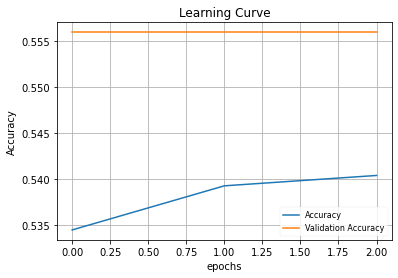

In [25]:
plt.title('Learning Curve')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.plot(history['accuracy'],label=('Accuracy'))
plt.plot(history['val_accuracy'],label=('Validation Accuracy'))
plt.grid(True)
plt.style.use('seaborn-paper')
# plt.show()
plt.legend()

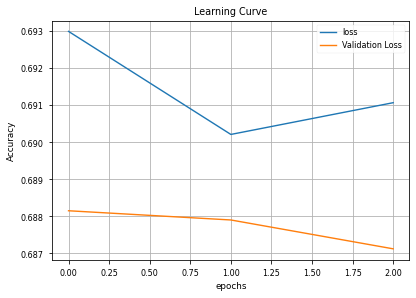

In [26]:
plt.title('Learning Curve')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.plot(history['loss'],label=('loss'))
plt.plot(history['val_loss'],label=('Validation Loss'))
plt.grid(True)
plt.style.use('seaborn-paper')
# plt.show()
plt.legend()

In [27]:
ypred =model.predict(xtest)

48/48 [==============================] - 88s 2s/step


In [28]:
type(ypred)

numpy.ndarray

In [29]:
type(ytest)

numpy.ndarray

In [38]:
import cv2
import tensorflow
import numpy as np
# model = tensorflow.keras.models.load_model('Mammooty.h5')

    
img= cv2.imread("mammooty.jpg")
#img = cv2.rotate(img,rotateCode=0)
hcc = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

img = cv2.resize(img, (800, 500))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res = hcc.detectMultiScale(gray)

for(x,y,w,h) in res:
    cv2.rectangle(img, (x,y),(x+w, y+h),(255,255,255),2)
    
img = cv2.resize(img,(600,500))
img = np.array(img, dtype = 'uint8')
img = cv2.resize(img, (100,100)) 

actors = {'Mohanlal':0,"mammooty":1}

pred_img = img.reshape(1,100,100,3)

face = model.predict(pred_img)
img = cv2.resize(img,(600,500))


#img = cv2.resize(img,(600,500))
for i in actors:
    if np.argmax(face) == actors[i]:
        name =i
        cv2.putText(img, name, (x,y), cv2.FONT_HERSHEY_SIMPLEX,.7, (0,255,0), 2)
        

cv2.imshow('a',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


1/1 [==============================] - 0s 155ms/step


In [39]:
res

()

In [47]:
for(x,y,w,h) in res:
    print (x,y,w,h)

In [41]:
face

array([[0.58939743, 0.41060257]], dtype=float32)

In [37]:
type(actors)

dict

In [38]:
face

array([[9.999455e-01, 5.448261e-05]], dtype=float32)